In [1]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings

# Ignore specific warning types
warnings.filterwarnings("ignore")

In [2]:
# Load data from the Excel file
data_description = pd.read_excel('Data_Description.xlsx')  # Replace with your actual file path
# Remove the index when writing to a new Excel file

emotion_data_val = data_description[:14].reset_index(drop=True)
transcript_data_val = data_description[16:].reset_index(drop=True)

# Rename the heading (the name of the column)
emotion_data_val.columns = ["Emotion Data","Value"]
transcript_data_val.columns = ["Transcript Data","Value"]

# Print the DataFrame with the updated heading
print(emotion_data_val)
print()
print(transcript_data_val)

        Emotion Data                                              Value
0           movie_id                              Unique ID for a video
1          image_seq                                      Image number 
2              angry                                angry emotion score
3            disgust                              disgust emotion score
4               fear                                 fear emotion score
5              happy                                happy emotion score
6                sad                                  sad emotion score
7           surprise                             surprise emotion score
8            neutral                              neutral emotion score
9   dominant_emotion              dominant emotion among other emotions
10              gaze  Candidate is looking at the camera or not. 1 f...
11             blink              Eye blink (1 -> blink, 0 -> No blink)
12        eye_offset                   Deviation of eye from the

# Transcript Data
- Step 1: Merge all csvs of Transcript data by adding Candidate ID

- Step 2: Drop ['text', 'start', 'end', 'id', 'seek'] columns

- Step 3: Multiply all emotional or quality value of a row with time duration of spoken transcript

- Step 3: MinMax Normalise all quality value


Also create Mean and Variance of each Candidate

In [3]:
# List of file names from '1.csv' to '10.csv'
file_names = [f"{i}.csv" for i in range(1, 11)]

# Specify the folder path where the CSV files are located
folder_path = 'transcript_data'

# Initialize DataFrames for mean, variance, and combined data
l1 = []
l1.append('candidate id')
for column in transcript_data_val['Transcript Data']:
    if column not in ['text', 'start', 'end', 'id', 'seek']:
        l1.append(column)
td = pd.DataFrame(columns=l1)

# Iterate through the list of file names
for file_name in file_names:
    # Construct the full path to the CSV file
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Drop unnecessary columns
    data = data.drop(columns=['text', 'tokens', 'id', 'seek'])
    
    # Iterate through columns in transcript_data_val
    for column in transcript_data_val['Transcript Data']:
        if column not in ['text', 'start', 'end', 'id', 'seek']:
            # Multiply reactions score with time duration by total time (weighted reactions)
            data[column] = data[column] * (data['end']-data['start']) / (data['end']-data['start']).sum()
    
    # Concatenate the data to the combined DataFrame
    data['candidate id'] = file_name[:-4]
    data = data.drop(columns=['start', 'end'])
    td = pd.concat([td, data], ignore_index=True)


In [4]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the numeric columns
normalized_data = scaler.fit_transform(td.drop(columns='candidate id'))

# Create a DataFrame with the normalized values and the same column names
normalized_df = pd.DataFrame(normalized_data, columns=td.drop(columns='candidate id').columns)

# Combine the normalized DataFrame with the 'candidate id' column
normalized_df['candidate id'] = td['candidate id']

# Print the normalized DataFrame
td = normalized_df
td

,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,temperature,avg_logprob,compression_ratio,no_speech_prob,candidate id
0,0.192908,0.084217,0.454768,0.458482,0.397547,0.440788,0.288494,0.290378,0.0,0.460816,0.869254,0.697204,1
1,0.131914,0.076027,0.320733,0.267140,0.250466,0.273712,0.134429,0.268204,0.0,0.460816,0.869254,0.697204,1
2,0.186598,0.053847,0.370964,0.429017,0.344303,0.435579,0.273584,0.290378,0.0,0.460816,0.869254,0.697204,1
3,0.104198,0.159082,0.192433,0.301536,0.274842,0.260151,0.088856,0.312551,0.0,0.460816,0.869254,0.697204,1
4,0.065668,0.254592,0.339306,0.133501,0.227654,0.199554,0.074973,0.356899,0.0,0.460816,0.869254,0.697204,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.249044,0.035259,0.342041,0.450083,0.096821,0.296019,0.113766,0.375329,0.0,0.854868,0.907025,0.036413,10
170,0.220016,0.127110,0.376494,0.274064,0.330042,0.169713,0.062246,0.375329,0.0,0.854868,0.907025,0.036413,10
171,0.218800,0.128361,0.391008,0.076929,0.229380,0.014654,0.136550,0.375329,0.0,0.854868,0.907025,0.036413,10
172,0.225554,0.179643,0.418243,0.364161,0.263824,0.245420,0.056882,0.375329,0.0,0.571316,0.439853,0.107495,10


In [5]:
print(td.describe())

         positive    negative     neutral   confident    hesitant     concise  \
count  174.000000  174.000000  174.000000  174.000000  174.000000  174.000000   
mean     0.197496    0.091796    0.266027    0.313159    0.214026    0.249584   
std      0.114533    0.108427    0.194094    0.171634    0.144031    0.175211   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.136004    0.034101    0.118914    0.197512    0.118453    0.116140   
50%      0.194033    0.064025    0.236987    0.330867    0.205094    0.221043   
75%      0.246049    0.126233    0.372846    0.405806    0.293161    0.327051   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       enthusiastic  speech_speed  temperature  avg_logprob  \
count    174.000000    174.000000        174.0   174.000000   
mean       0.175146      0.310631          0.0     0.765953   
std        0.144913      0.127588          0.0     0.130500   
min        0.00000

# Box Plot of Candidatewise data of Transcript Data

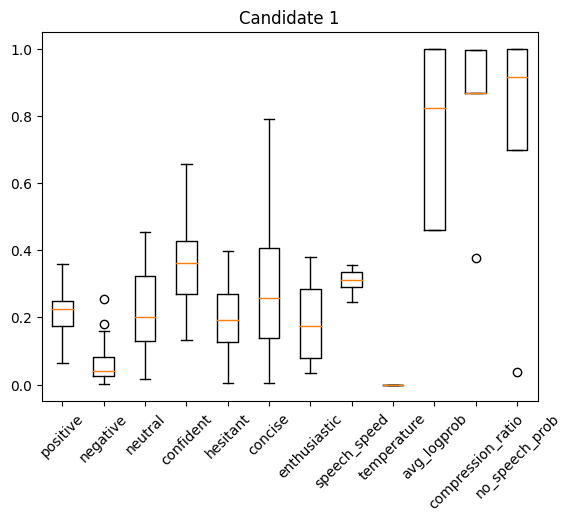

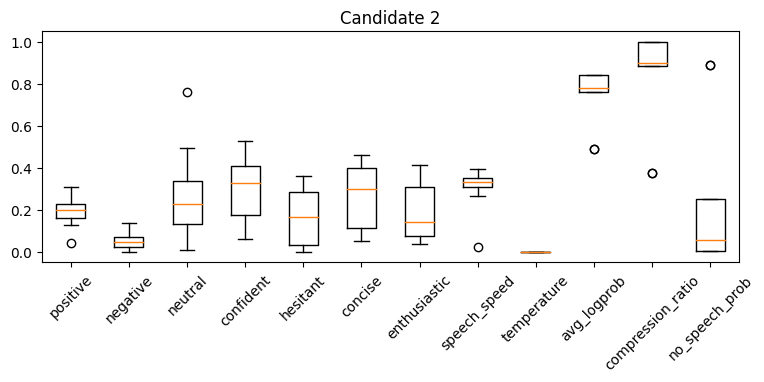

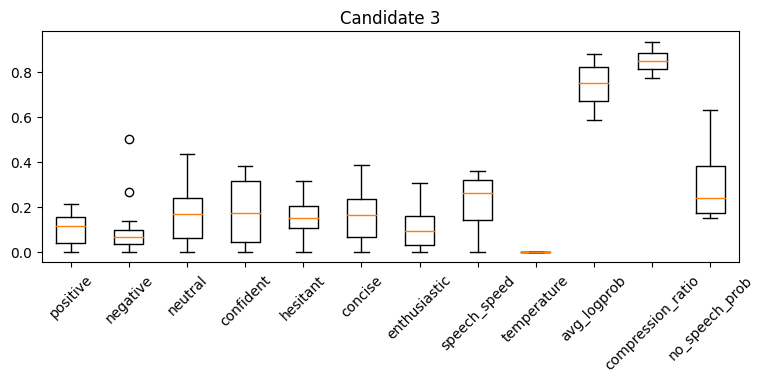

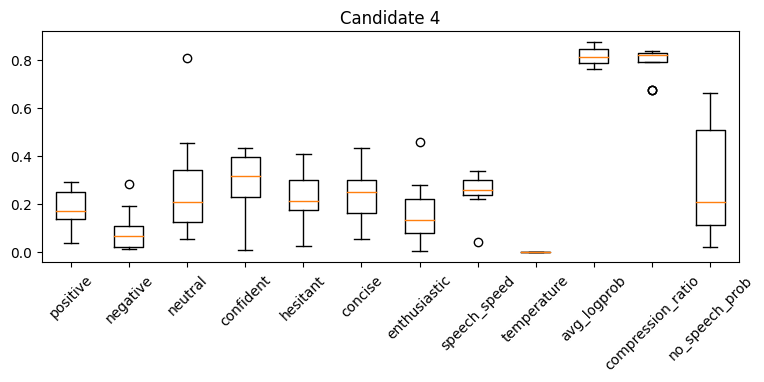

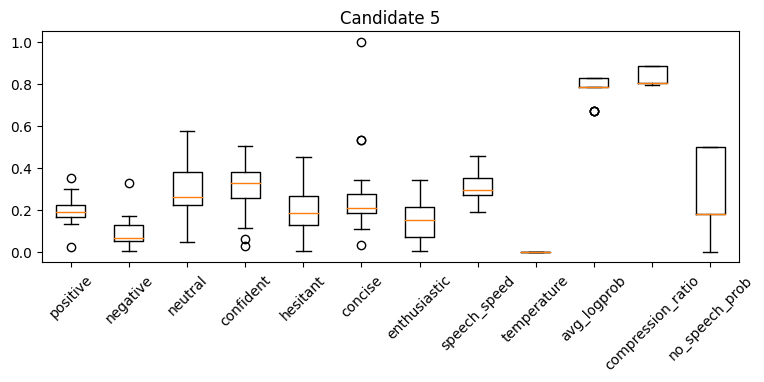

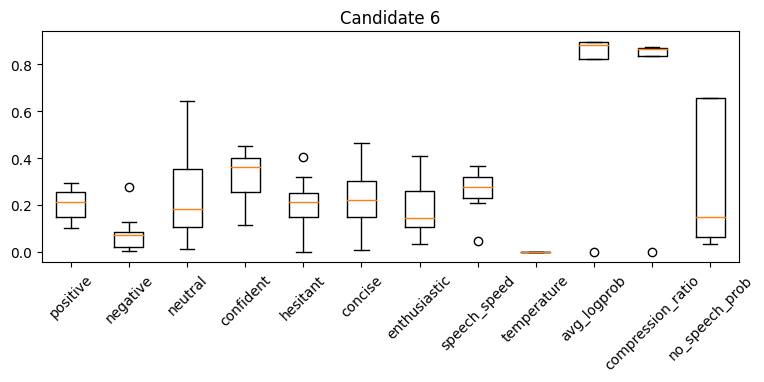

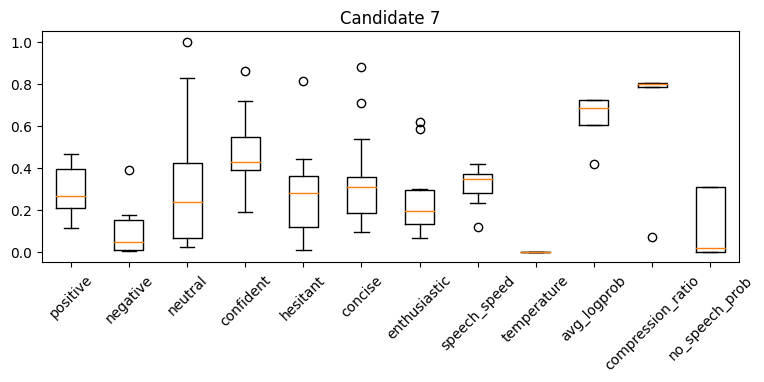

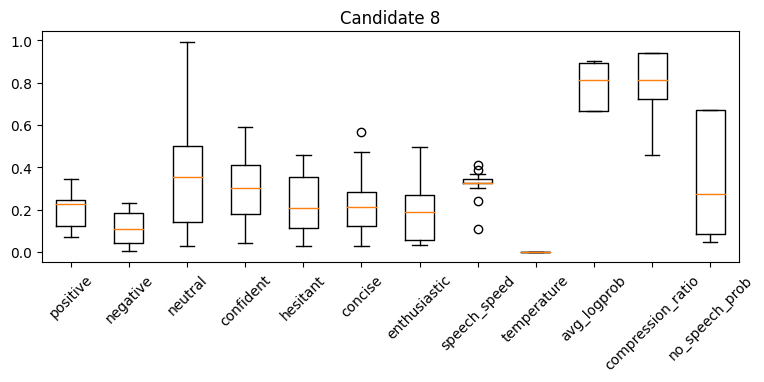

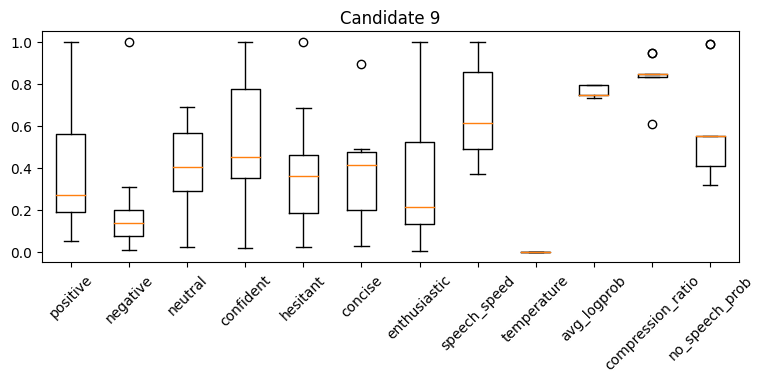

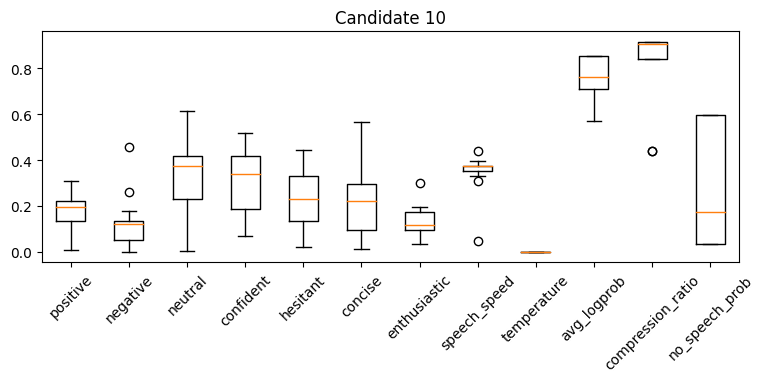

In [6]:
for i in range(1,11):
    x_labels = td.drop(columns=['candidate id']).columns.tolist()
    fig, ax = plt.subplots()
    ax.boxplot(td[td['candidate id']==str(i)].drop(columns=['candidate id']))
    ax.set_xticklabels(x_labels, rotation=45)
    plt.rcParams['figure.figsize'] = (9, 3)
    plt.title('Candidate '+ str(i))
    plt.show()

In [7]:
# Assuming you have a DataFrame named 'td' with 'candidate id' and other attributes
# and you already have 'l1' defined as the list of columns

# Create empty DataFrames to store the mean and variance results
td_mean = pd.DataFrame(columns=l1)
td_var = pd.DataFrame(columns=l1)

# Loop through candidate IDs from 1 to 10
for i in range(1, 11):
    # Filter the DataFrame for the current candidate ID
    candidate_data = td[td['candidate id'] == str(i)].drop(columns=['candidate id'])
    
    # Calculate the mean and variance for each attribute
    candidate_mean = candidate_data.mean()
    candidate_variance = candidate_data.var()
    # Append the mean and variance to their respective DataFrames
    td_mean = td_mean.append(candidate_mean, ignore_index=True)
    td_var = td_var.append(candidate_variance, ignore_index=True)

# Add a column to indicate the candidate ID in both DataFrames
td_mean['candidate id'] = range(1, 11)
td_var['candidate id'] = range(1, 11)

# 'td_mean' now contains the mean values for each attribute for each candidate
# 'td_var' now contains the variance values for each attribute for each candidate
print("Mean DataFrame:")
print(td_mean)

print("\nVariance DataFrame:")
print(td_var)

Mean DataFrame:
   candidate id  positive  negative   neutral  confident  hesitant   concise  \
0             1  0.211774  0.065586  0.222227   0.353294  0.196585  0.273736   
1             2  0.198487  0.050909  0.254924   0.309969  0.165801  0.271033   
2             3  0.106510  0.082676  0.160403   0.183435  0.156122  0.158870   
3             4  0.180276  0.080949  0.254459   0.286113  0.225616  0.230287   
4             5  0.197364  0.093754  0.297620   0.297884  0.197845  0.283974   
5             6  0.207761  0.070170  0.228410   0.323942  0.205258  0.221076   
6             7  0.288954  0.097526  0.316704   0.471815  0.275506  0.340879   
7             8  0.194755  0.110208  0.360550   0.292542  0.231870  0.231101   
8             9  0.379015  0.223587  0.405836   0.532004  0.395568  0.385476   
9            10  0.176184  0.121844  0.318216   0.304198  0.234356  0.242455   

   enthusiastic  speech_speed  temperature  avg_logprob  compression_ratio  \
0      0.182235      0.31

# Bar Plot of Mean of Quality values of Transcript Candidatewise

Also Box Plot of Variance Data to get the knowledge about spreadness

- NOTE: Drop Temperature Column as same everytime

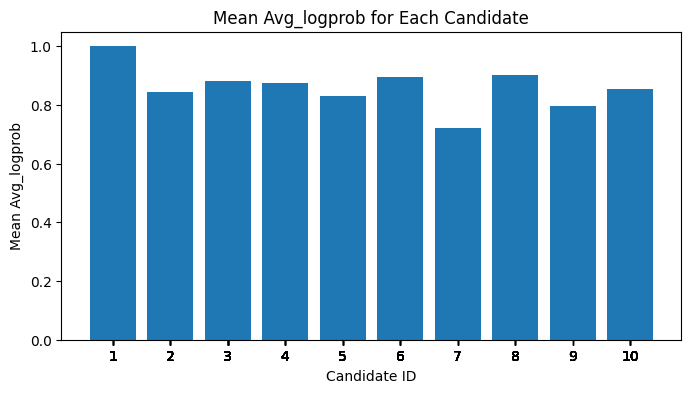

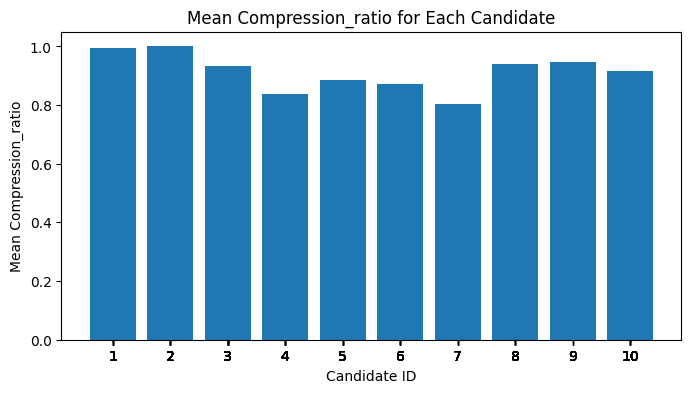

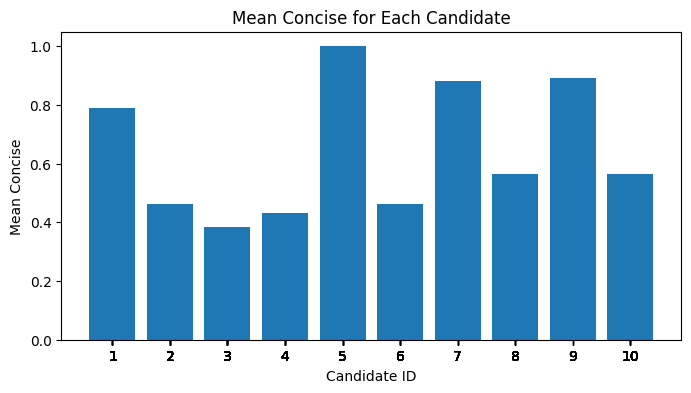

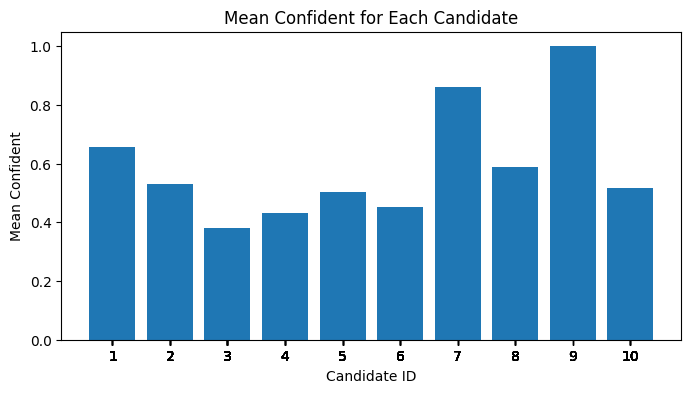

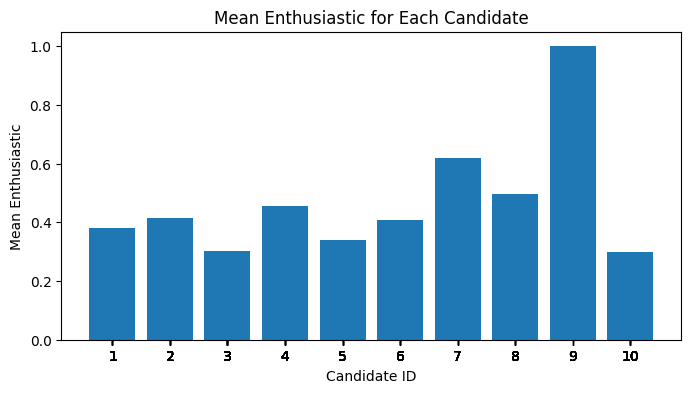

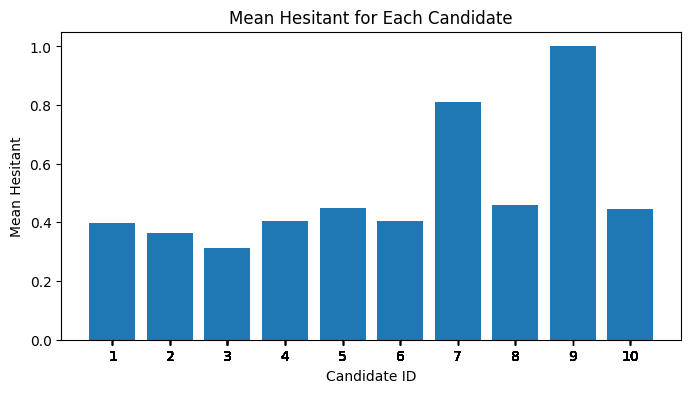

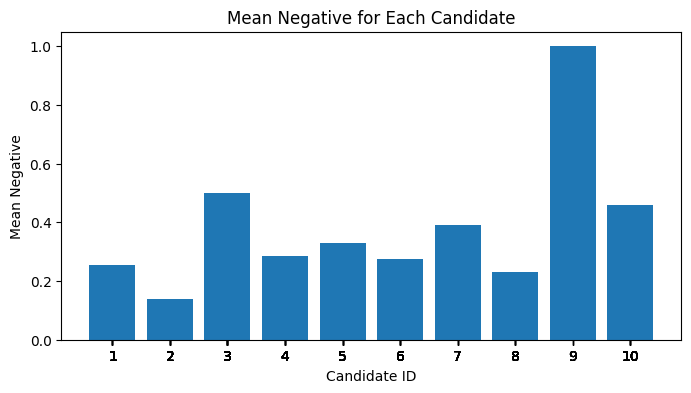

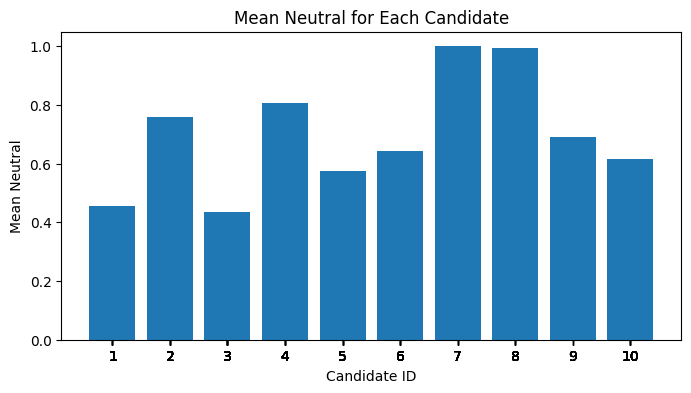

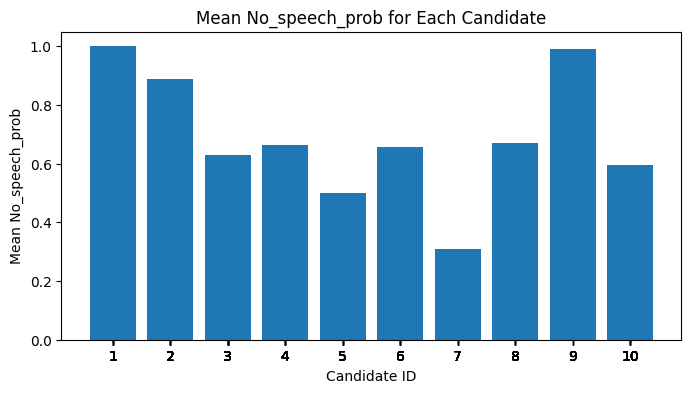

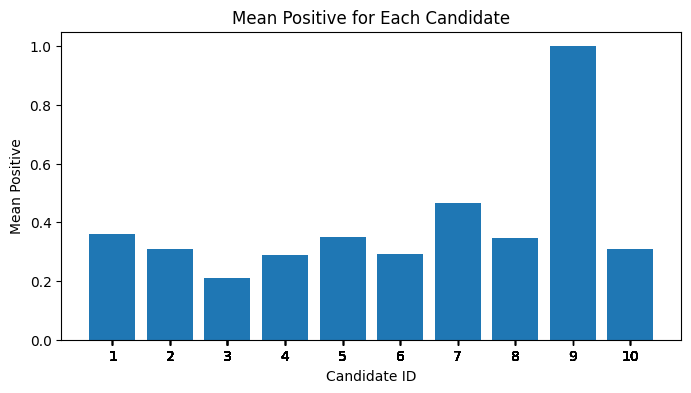

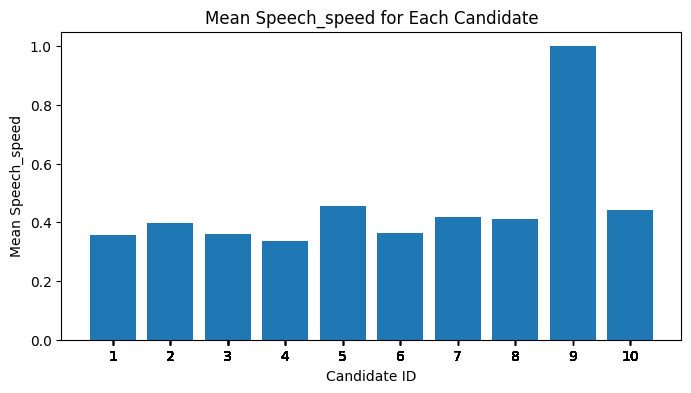

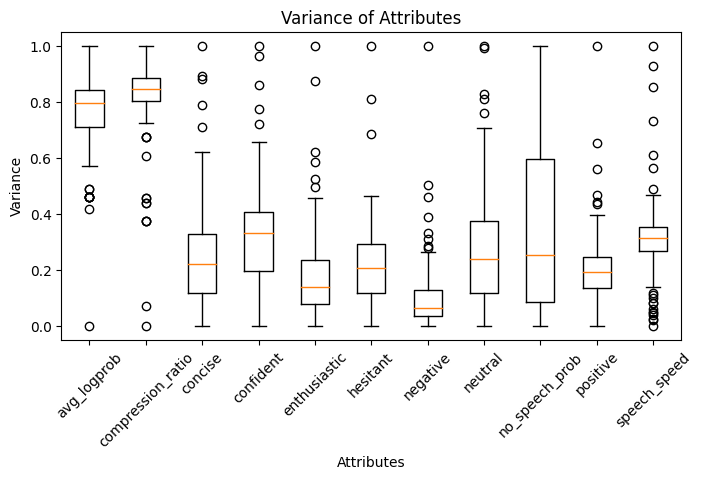

In [8]:
# Remove temperature attribute for being same for all
td = td.drop(columns=['temperature'])
td_mean = td_mean.drop(columns=['temperature'])
td_var = td_var.drop(columns=['temperature'])

# Get the list of all attribute columns (excluding 'candidate id')
attributes = td.columns.difference(['candidate id'])

# Plotting mean values using bar plots for all attributes
for attribute in attributes:
    plt.figure(figsize=(8, 4))
    plt.bar(td['candidate id'], td[attribute])
    plt.xlabel('Candidate ID')
    plt.ylabel('Mean ' + attribute.capitalize())
    plt.title('Mean ' + attribute.capitalize() + ' for Each Candidate')
    plt.xticks(td['candidate id'])
    plt.show()

# Plotting variance values using box plots for all attributes
variance_data = td[attributes].var()
plt.figure(figsize=(8, 4))
plt.boxplot([td[attribute] for attribute in attributes])
plt.xlabel('Attributes')
plt.ylabel('Variance')
plt.title('Variance of Attributes')
plt.xticks(range(1, len(attributes) + 1), attributes, rotation=45)
plt.show()

# Emotion Data
- Step 1: Merge all csvs of Emotion data by adding Candidate ID

- Step 2: Drop ['movie_id', 'dominant_emotion', 'image_seq'] columns

- Step 3: MinMax Normalise all emotional value

Also create Mean and Variance of each Candidate

In [9]:
# Specify the folder path where the CSV files are located
folder_path = 'emotion_data'

l1 = []
l1.append('candidate id')
for column in emotion_data_val['Emotion Data']:
    if column not in ['movie_id', 'dominant_emotion', 'image_seq']:
        l1.append(column)
ed = pd.DataFrame(columns=l1)

# Iterate through the list of file names
for file_name in file_names:
    # Construct the full path to the CSV file
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    data = data.drop(columns=['movie_id','upload_time','dominant_emotion', 'participant_id', 'image_seq'])
    # Concatenate the data to the combined DataFrame
    data['candidate id'] = file_name[:-4]
    ed = pd.concat([ed, data], ignore_index=True)


In [10]:
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the numeric columns
normalized_data = scaler.fit_transform(ed.drop(columns='candidate id'))

# Create a DataFrame with the normalized values and the same column names
normalized_df = pd.DataFrame(normalized_data, columns=ed.drop(columns='candidate id').columns)

# Combine the normalized DataFrame with the 'candidate id' column
normalized_df['candidate id'] = ed['candidate id']

# Print the normalized DataFrame
ed = normalized_df
print(ed)

        angry       disgust      fear     happy       sad      surprise  \
0    0.067463  1.879875e-05  0.045493  0.001344  0.036259  5.570027e-03   
1    0.313637  1.075535e-01  0.315840  0.055561  0.115493  2.194707e-02   
2    0.397786  1.531145e-04  0.026646  0.048811  0.053681  4.583904e-02   
3    0.019885  4.009976e-06  0.006593  0.000281  0.109159  1.853487e-04   
4    0.312870  1.014110e-04  0.018269  0.120342  0.001791  5.084821e-01   
..        ...           ...       ...       ...       ...           ...   
649  0.227481  2.538358e-02  0.558407  0.018376  0.147161  2.011745e-02   
650  0.005090  6.419816e-06  0.836242  0.021980  0.126853  5.932375e-04   
651  0.001843  3.722823e-11  0.133056  0.000000  0.647811  1.465996e-08   
652  0.003430  1.580806e-06  0.011803  0.000382  0.335654  1.112656e-04   
653  0.000434  3.332343e-09  0.000057  0.000128  0.008571  3.606755e-04   

      neutral  gaze  blink  eye_offset  elapsed_time  distance candidate id  
0    0.848006   1.0  

In [11]:
print(ed.describe())

            angry       disgust        fear       happy         sad  \
count  654.000000  6.540000e+02  654.000000  654.000000  654.000000   
mean     0.055783  7.195801e-03    0.182119    0.124617    0.116721   
std      0.124965  4.813822e-02    0.252914    0.247020    0.197041   
min      0.000000  0.000000e+00    0.000000    0.000000    0.000000   
25%      0.001728  7.551696e-08    0.005592    0.000865    0.003880   
50%      0.011243  1.110684e-05    0.046432    0.008618    0.023129   
75%      0.045622  6.317307e-04    0.287002    0.106383    0.119973   
max      1.000000  1.000000e+00    1.000000    1.000000    1.000000   

         surprise     neutral        gaze       blink  eye_offset  \
count  654.000000  654.000000  654.000000  654.000000  654.000000   
mean     0.051325    0.473858    0.759939    0.085627    0.387289   
std      0.144500    0.401449    0.427447    0.280027    0.144796   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.0001

# Box Plot of Candidatewise data of Emotion Data

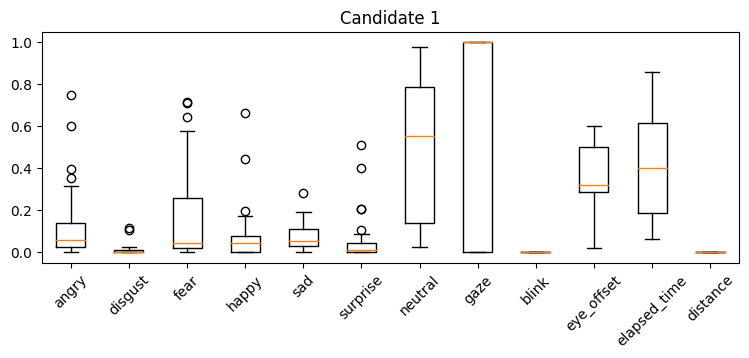

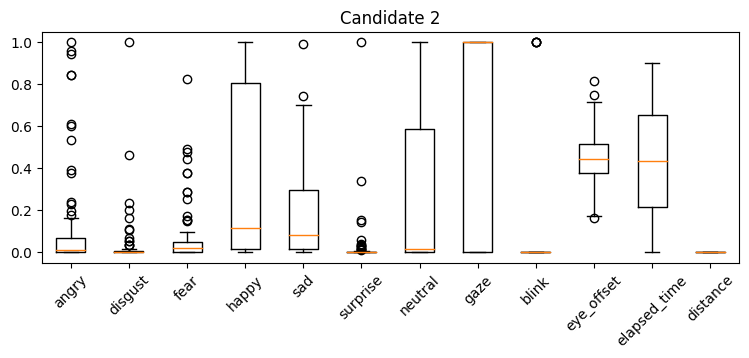

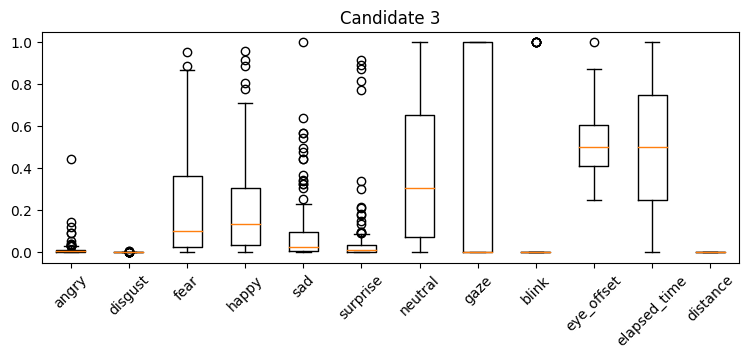

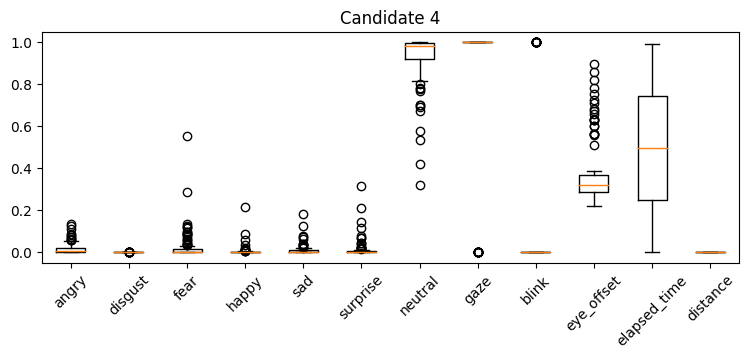

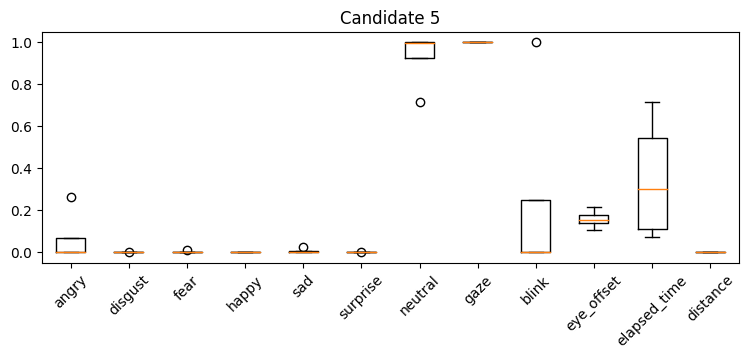

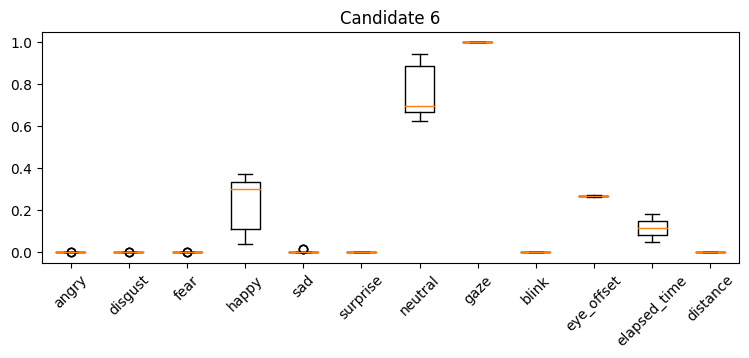

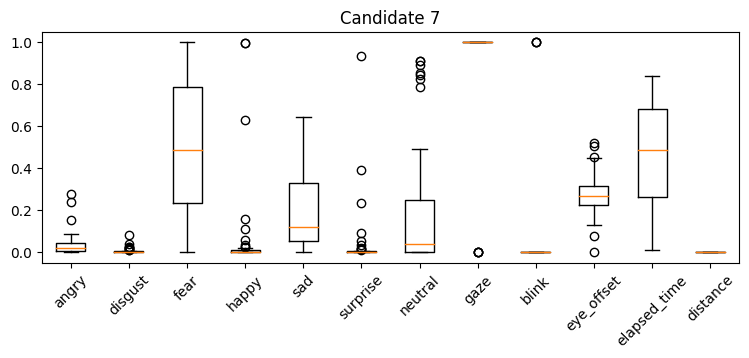

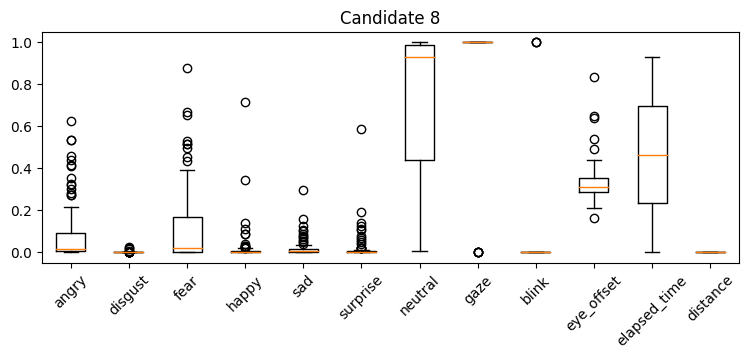

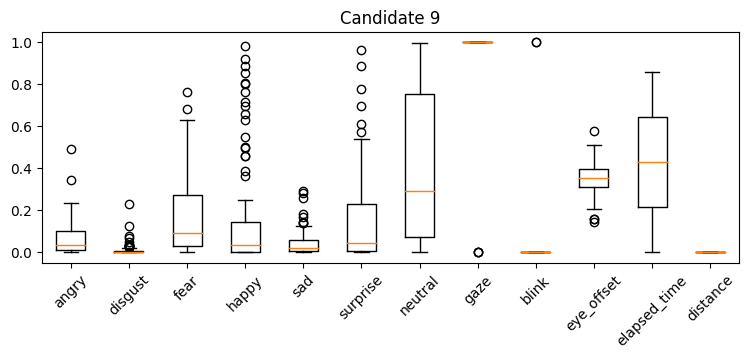

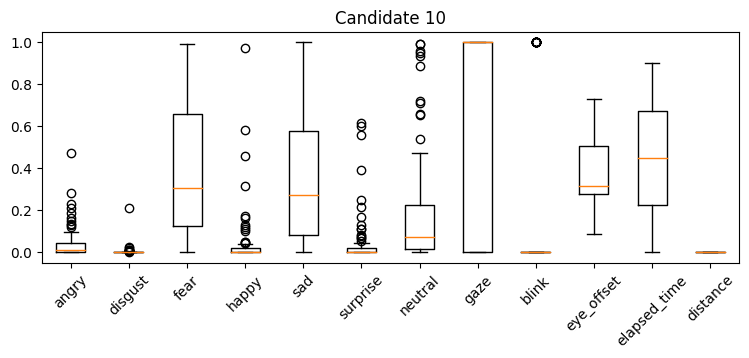

In [12]:
for i in range(1, 11):
    x_labels = ed.drop(columns=['candidate id']).columns.tolist()
    fig, ax = plt.subplots()
    ax.boxplot(ed[ed['candidate id']==str(i)].drop(columns=['candidate id']))
    ax.set_xticklabels(x_labels, rotation=45)
    plt.rcParams['figure.figsize'] = (9, 3)
    plt.title('Candidate '+str(i))
    plt.show()

In [13]:
# Assuming you have a DataFrame named 'ed' with 'candidate id' and other attributes
# and you already have 'l1' defined as the list of columns

# Create empty DataFrames to store the mean and variance results
ed_mean = pd.DataFrame(columns=l1)
ed_var = pd.DataFrame(columns=l1)

# Loop through candidate IDs from 1 to 10
for i in range(1, 11):
    # Filter the DataFrame for the current candidate ID
    candidate_data = ed[ed['candidate id'] == str(i)].drop(columns=['candidate id'])
    
    # Calculate the mean and variance for each attribute
    candidate_mean = candidate_data.mean()
    candidate_variance = candidate_data.var()
    # Append the mean and variance to their respective DataFrames
    ed_mean = ed_mean.append(candidate_mean, ignore_index=True)
    ed_var = ed_var.append(candidate_variance, ignore_index=True)

# Add a column to indicate the candidate ID in both DataFrames
ed_mean['candidate id'] = range(1, 11)
ed_var['candidate id'] = range(1, 11)

# 'ed_mean' now contains the mean values for each attribute for each candidate
# 'ed_var' now contains the variance values for each attribute for each candidate
print("Mean DataFrame:")
print(ed_mean)

print("\nVariance DataFrame:")
print(ed_var)

Mean DataFrame:
   candidate id     angry       disgust      fear     happy       sad  \
0             1  0.137249  1.151562e-02  0.164066  0.083167  0.078113   
1             2  0.109357  3.085136e-02  0.067644  0.350697  0.188727   
2             3  0.016107  1.454306e-04  0.216875  0.214323  0.104702   
3             4  0.018243  2.649758e-05  0.026088  0.005728  0.010756   
4             5  0.065873  1.310200e-06  0.002034  0.001014  0.006649   
5             6  0.000043  2.240366e-08  0.000355  0.223677  0.004437   
6             7  0.036171  5.654858e-03  0.475197  0.062715  0.205038   
7             8  0.085374  8.817913e-04  0.119692  0.021208  0.019881   
8             9  0.066672  1.099523e-02  0.186493  0.167372  0.043656   
9            10  0.040571  3.815018e-03  0.362343  0.042161  0.332101   

   surprise   neutral      gaze     blink  eye_offset  elapsed_time  distance  
0  0.060432  0.484202  0.633333  0.000000    0.380887      0.411785       0.0  
1  0.022726  0.26578

In [14]:
# Define a list of emotion columns to compare
emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Extract the candidate ID, emotions, and the corresponding emotion with the maximum value
result = ed_mean[['candidate id']]

# Calculate the column name (emotion) with the maximum value for each row (candidate)
result['max_emotion'] = ed_mean[emotion_columns].idxmax(axis=1)

# Print the result
print(result)

   candidate id max_emotion
0             1     neutral
1             2       happy
2             3     neutral
3             4     neutral
4             5     neutral
5             6     neutral
6             7        fear
7             8     neutral
8             9     neutral
9            10        fear


# Bar Plot of Mean of Quality values of Emotion Candidatewise

Also Box Plot of Variance Data to get the knowledge about spreadness

- NOTE: Drop Distance Column as same everytime

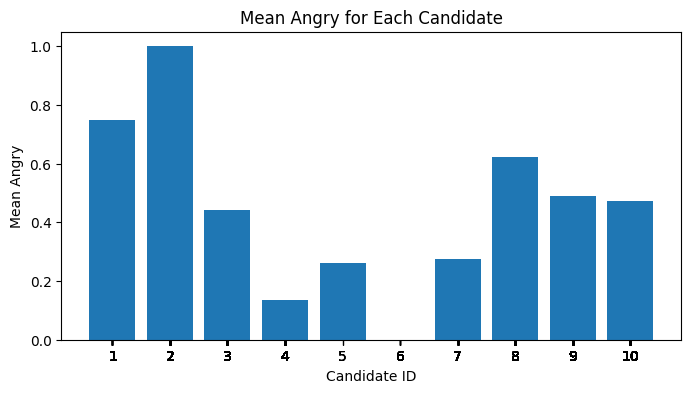

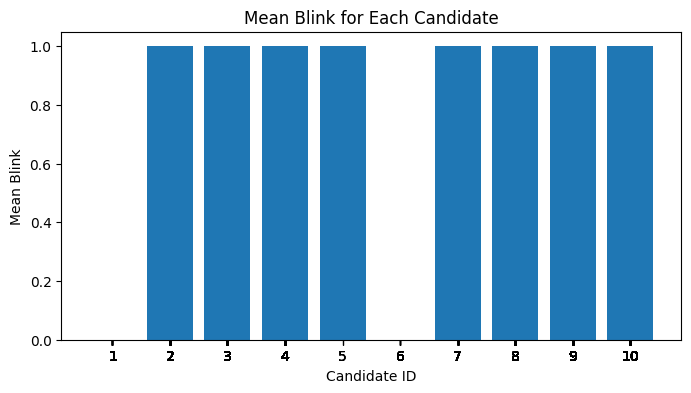

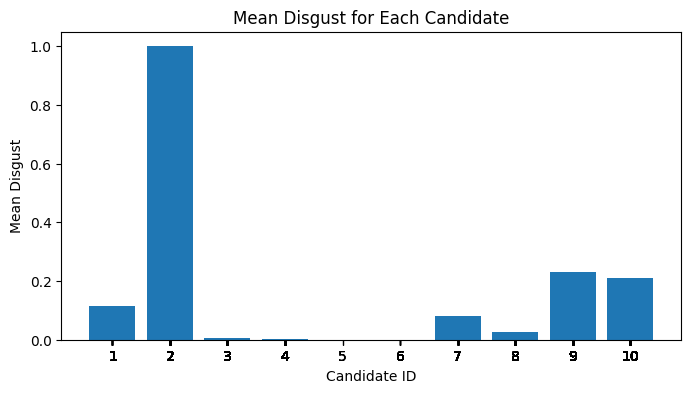

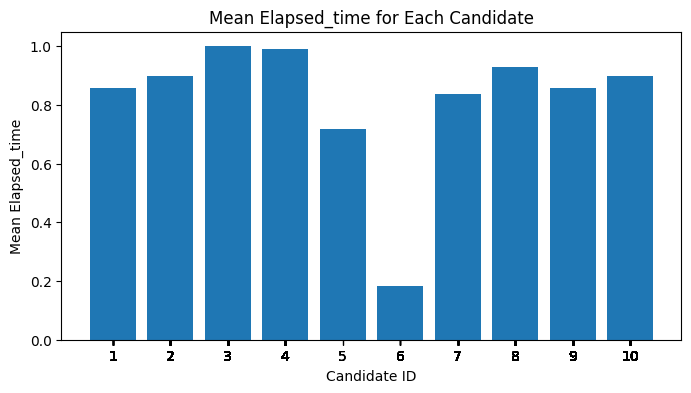

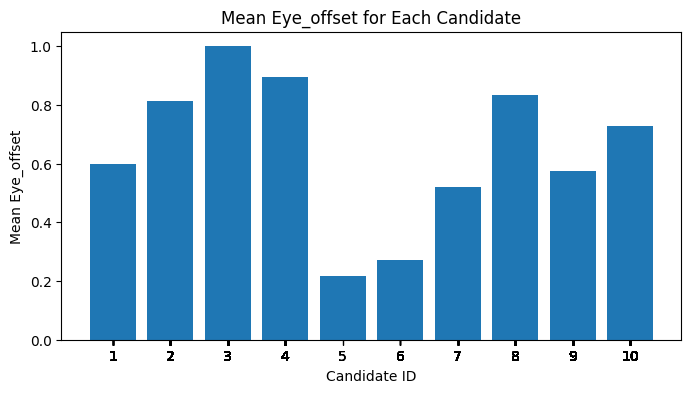

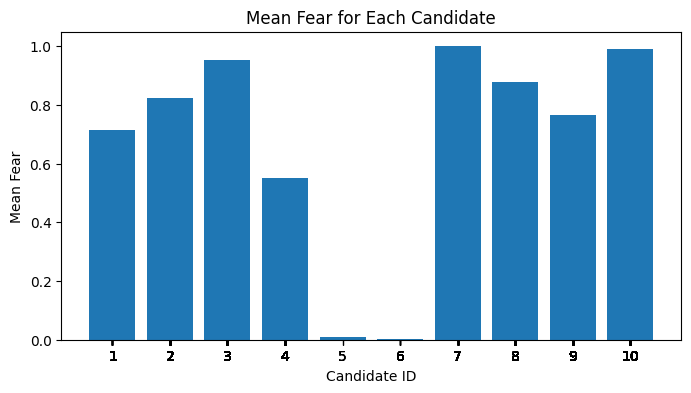

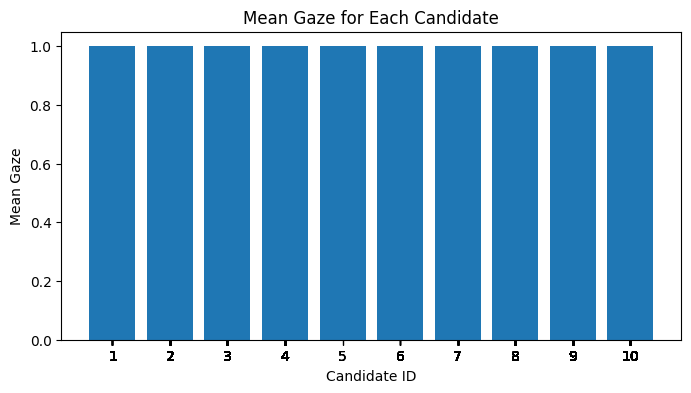

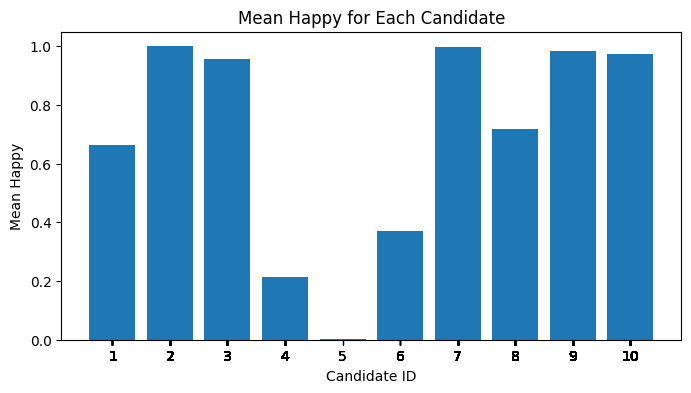

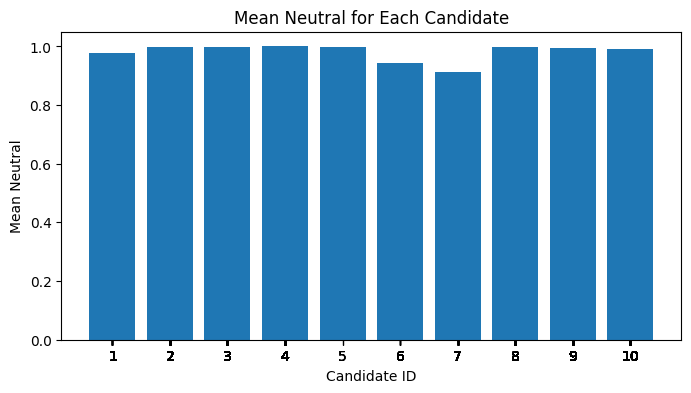

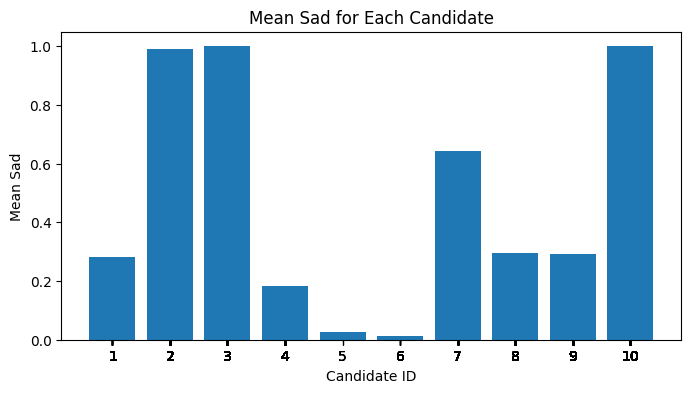

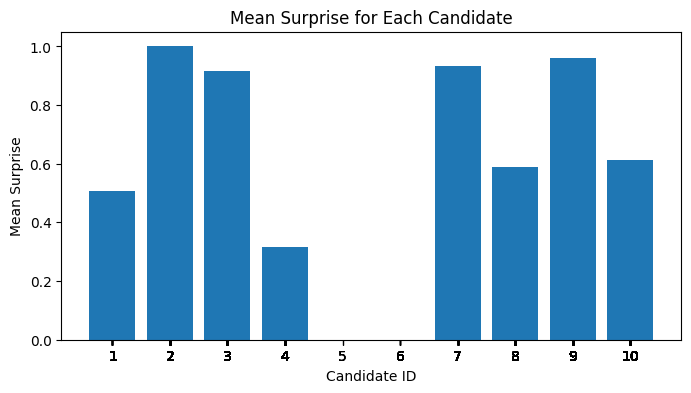

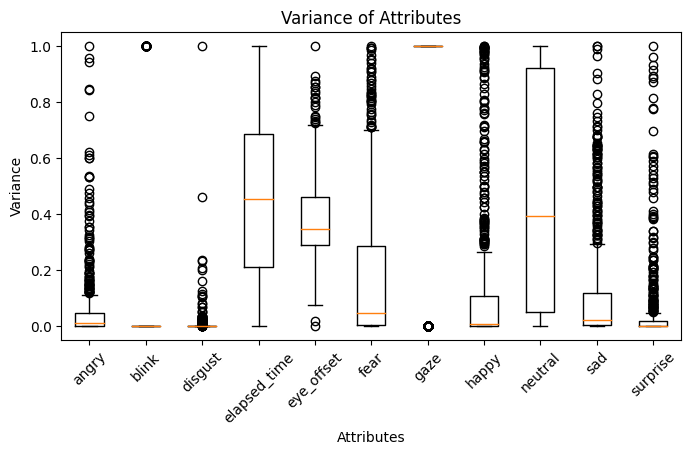

In [15]:
# Remove temperature attribute for being same for all
ed = ed.drop(columns=['distance'])
ed_mean = ed_mean.drop(columns=['distance'])
ed_var = ed_var.drop(columns=['distance'])

# Get the list of all attribute columns (excluding 'candidate id')
attributes = ed.columns.difference(['candidate id'])

# Plotting mean values using bar plots for all attributes
for attribute in attributes:
    plt.figure(figsize=(8, 4))
    plt.bar(ed['candidate id'], ed[attribute])
    plt.xlabel('Candidate ID')
    plt.ylabel('Mean ' + attribute.capitalize())
    plt.title('Mean ' + attribute.capitalize() + ' for Each Candidate')
    plt.xticks(ed['candidate id'])
    plt.show()

# Plotting variance values using box plots for all attributes
variance_data = ed[attributes].var()
plt.figure(figsize=(8, 4))
plt.boxplot([ed[attribute] for attribute in attributes])
plt.xlabel('Attributes')
plt.ylabel('Variance')
plt.title('Variance of Attributes')
plt.xticks(range(1, len(attributes) + 1), attributes, rotation=45)
plt.show()

***Candidate ChatGPT Generated Summary***

**Candidate 1:**
- **Education:** Pursuing postgraduate and management from IIM Kozhikode, B.Tech in Biotechnology from Heritage Institute of Technology Kolkata, M.Tech from IIT Kharagpur.
- **Work Experience:** Three years in regulatory affairs in the pharmaceutical industry, medical writer at Ciro Klein Farm, specialized in drug safety and risk management.
- **Skills:** Regulatory affairs, medical writing, drug safety, risk management, biotechnology.

**Candidate 2:**
- **Education:** Completed BBA in 2022.
- **Work Experience:** Interned in a boutique investment bank, interned with Kabadi Techno, focused on finance.
- **Skills:** Investment banking, finance, financial modeling, startup growth.

**Candidate 3:**
- **Education:** School activity head, top 1.2% rank in undergraduate entrance exam, honours degree from Varanasi University.
- **Work Experience:** Internship in a steel manufacturing firm, internship in an accounting firm.
- **Skills:** Sales, accounting, event coordination.

**Candidate 4:**
- **Education:** Engineering graduate in electronics and communication.
- **Work Experience:** Academic advisor in a school for 19 months.
- **Skills:** Academic advising, electronics, communication.

**Candidate 5:**
- **Education:** Undergraduate in mass media with a specialization in advertising.
- **Certifications:** Entrepreneurship course by Turnip, foundations of management by Google.
- **Skills:** Advertising, entrepreneurship, content creation (drawing, painting, singing, writing movie reviews).

**Candidate 6:**
- **Education:** First-year MBA analytics student from IIM Kashipur, engineering graduate.
- **Work Experience:** Three years at Deloitte, validation processes for pharmaceutical software.
- **Skills:** Analytics, strategy, validation processes.

**Candidate 7:**
- **Education:** Undergraduation in earth science, worked at General Insurance Corporation of India.
- **Skills:** Reinsurance, underwriting, verbal and written communication.

**Candidate 8:**
- **Education:** PGP finance student at IIM Co-Ecode, chartered accountant, CFA Level 1.
- **Work Experience:** Over three years with PwC, internship with ITC Limited.
- **Skills:** Financial analysis, internal audit, edtech.

**Candidate 9:**
- **Education:** First-year MBA student at IIM Lucknow, B.Tech in Agriculture Engineering, M.Tech in Food Process Engineering.
- **Entrepreneurship:** Co-founded an Agritech startup.
- **Project Leadership:** Led a project on the application of remote sensing IoT and artificial intelligence in agriculture.
- **Skills:** Agriculture, entrepreneurship, business development, strategy, remote sensing, IoT, AI.

**Candidate 10:**
- **Education:** Graduation in B.Com Honours.
- **Work Experience:** Interned as an Accounting Associate and Tax Associate.
- **Leadership:** Captain of the students committee in school, class representative in college, part of Bad Scouts and Guide.
- **Skills:** Accounting, taxation, leadership, social activities.


In [16]:
combined_data = pd.merge(ed, td, on='candidate id', how='inner')
combined_data_mean = pd.merge(ed_mean, td_mean, on='candidate id', how='inner')
print(combined_data)

          angry       disgust      fear     happy       sad  surprise  \
0      0.067463  1.879875e-05  0.045493  0.001344  0.036259  0.005570   
1      0.067463  1.879875e-05  0.045493  0.001344  0.036259  0.005570   
2      0.067463  1.879875e-05  0.045493  0.001344  0.036259  0.005570   
3      0.067463  1.879875e-05  0.045493  0.001344  0.036259  0.005570   
4      0.067463  1.879875e-05  0.045493  0.001344  0.036259  0.005570   
...         ...           ...       ...       ...       ...       ...   
11644  0.000434  3.332343e-09  0.000057  0.000128  0.008571  0.000361   
11645  0.000434  3.332343e-09  0.000057  0.000128  0.008571  0.000361   
11646  0.000434  3.332343e-09  0.000057  0.000128  0.008571  0.000361   
11647  0.000434  3.332343e-09  0.000057  0.000128  0.008571  0.000361   
11648  0.000434  3.332343e-09  0.000057  0.000128  0.008571  0.000361   

       neutral_x  gaze  blink  eye_offset  ...  negative neutral_y  confident  \
0       0.848006   1.0    0.0    0.296814 

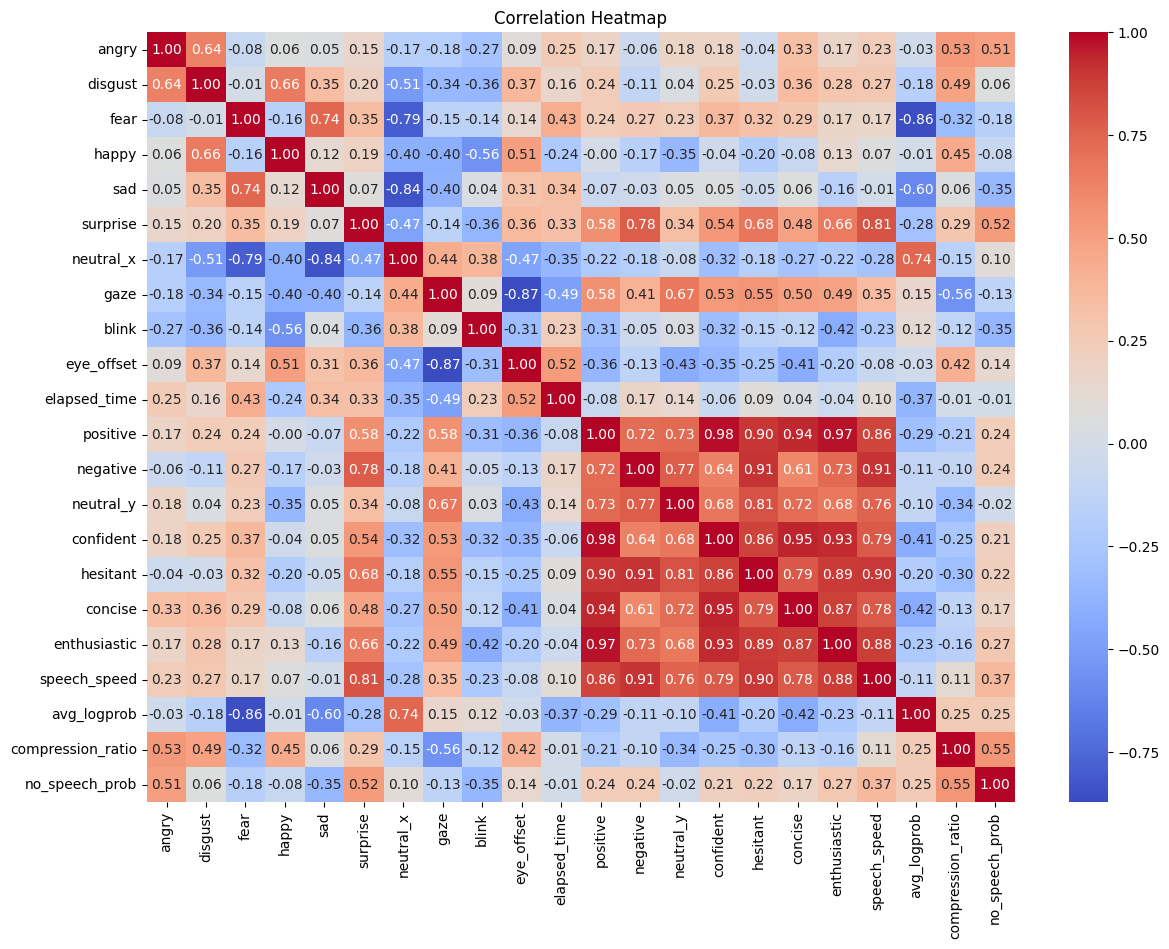

In [17]:
# Correlation Analysis
correlation_matrix = combined_data_mean.drop(columns=['candidate id']).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
combined_data.drop(columns=['candidate id']).corr().sum()

angry                1.431071
disgust              1.409897
fear                 0.454482
happy               -0.359660
sad                  0.365864
surprise             0.975349
neutral_x           -1.026928
gaze                 0.807866
blink                0.796728
eye_offset          -0.338206
elapsed_time         0.774005
positive             3.181514
negative             1.841039
neutral_y            2.891230
confident            3.903186
hesitant             3.290998
concise              3.506800
enthusiastic         2.678890
speech_speed         4.645748
avg_logprob          1.038160
compression_ratio    1.984605
no_speech_prob       1.074012
dtype: float64

In [19]:
# removing eye_offset, happy and sad because it is much correlated
combined_data_mean = combined_data_mean.drop(columns=['eye_offset', 'happy', 'sad'])
combined_data = combined_data.drop(columns=['eye_offset', 'happy', 'sad'])

In [20]:
# Define threshold values for each emotion and attribute
criteria_thresholds = {
    'angry': {'threshold': combined_data_mean['angry'].mean(), 'above_threshold': False},
    'disgust': {'threshold': combined_data_mean['disgust'].mean(), 'above_threshold': False},
    'fear': {'threshold': combined_data_mean['fear'].mean(), 'above_threshold': False},
    'surprise': {'threshold': combined_data_mean['surprise'].mean(), 'above_threshold': True},
    'neutral_x': {'threshold': combined_data_mean['neutral_x'].mean(), 'above_threshold': True},
    'gaze': {'threshold': combined_data_mean['gaze'].mean(), 'above_threshold': True},
    'blink': {'threshold': combined_data_mean['blink'].mean(), 'above_threshold': False},
    'elapsed_time': {'threshold': combined_data_mean['elapsed_time'].mean(), 'above_threshold': True},
    'positive': {'threshold': combined_data_mean['positive'].mean(), 'above_threshold': True},
    'negative': {'threshold': combined_data_mean['negative'].mean(), 'above_threshold': True},
    'neutral_y': {'threshold': combined_data_mean['neutral_y'].mean(), 'above_threshold': True},
    'confident': {'threshold': combined_data_mean['confident'].mean(), 'above_threshold': True},
    'hesitant': {'threshold': combined_data_mean['hesitant'].mean(), 'above_threshold': False},
    'concise': {'threshold': combined_data_mean['concise'].mean(), 'above_threshold': True},
    'enthusiastic': {'threshold': combined_data_mean['enthusiastic'].mean(), 'above_threshold': True},
    'speech_speed': {'threshold': combined_data_mean['speech_speed'].mean(), 'above_threshold': True},
    'avg_logprob': {'threshold': combined_data_mean['avg_logprob'].mean(), 'above_threshold': True},
    'compression_ratio': {'threshold': combined_data_mean['compression_ratio'].mean(), 'above_threshold': True},
    'no_speech_prob': {'threshold': combined_data_mean['no_speech_prob'].mean(), 'above_threshold': False},
}
print(criteria_thresholds)

{'angry': {'threshold': 0.057565969268293084, 'above_threshold': False}, 'disgust': {'threshold': 0.006388713017004685, 'above_threshold': False}, 'fear': {'threshold': 0.16207862971313336, 'above_threshold': False}, 'surprise': {'threshold': 0.0426566527069501, 'above_threshold': True}, 'neutral_x': {'threshold': 0.5253451314927009, 'above_threshold': True}, 'gaze': {'threshold': 0.8046662322504838, 'above_threshold': True}, 'blink': {'threshold': 0.08591022981635138, 'above_threshold': False}, 'elapsed_time': {'threshold': 0.4111933397531775, 'above_threshold': True}, 'positive': {'threshold': 0.2141078230050824, 'above_threshold': True}, 'negative': {'threshold': 0.09972108482849242, 'above_threshold': True}, 'neutral_y': {'threshold': 0.28193489342789535, 'above_threshold': True}, 'confident': {'threshold': 0.33551968951008676, 'above_threshold': True}, 'hesitant': {'threshold': 0.22845261219553645, 'above_threshold': False}, 'concise': {'threshold': 0.26388879900963397, 'above_thr

In [21]:
# Initialize a DataFrame to store suitable candidates
suitable_candidates = pd.DataFrame()

# Create a custom function to apply the thresholding logic for each row
def apply_thresholds(row):
    for emotion, threshold_info in criteria_thresholds.items():
        threshold = threshold_info['threshold']
        above_threshold = threshold_info['above_threshold']
        if row[emotion] > threshold and above_threshold:
            row[emotion] = 1
        elif row[emotion] <= threshold and not above_threshold:
            row[emotion] = 1
        else:
            row[emotion] = 0
    return row

# Apply the custom function to each row in the DataFrame
combined_data_binary = combined_data_mean.apply(apply_thresholds, axis=1)
print(combined_data_binary)

   candidate id  angry  disgust  fear  surprise  neutral_x  gaze  blink  \
0           1.0    0.0      0.0   0.0       1.0        0.0   0.0    1.0   
1           2.0    0.0      0.0   1.0       0.0        0.0   0.0    1.0   
2           3.0    1.0      1.0   0.0       1.0        0.0   0.0    1.0   
3           4.0    1.0      1.0   1.0       0.0        1.0   0.0    0.0   
4           5.0    0.0      1.0   1.0       0.0        1.0   1.0    0.0   
5           6.0    1.0      1.0   1.0       0.0        1.0   1.0    1.0   
6           7.0    1.0      1.0   0.0       0.0        0.0   1.0    1.0   
7           8.0    0.0      1.0   1.0       0.0        1.0   1.0    1.0   
8           9.0    0.0      0.0   0.0       1.0        0.0   1.0    1.0   
9          10.0    1.0      1.0   0.0       1.0        0.0   0.0    0.0   

   elapsed_time  positive  negative  neutral_y  confident  hesitant  concise  \
0           1.0       0.0       0.0        0.0        1.0       1.0      1.0   
1           1.

In [22]:
print((combined_data_binary.drop(columns=['candidate id'])).describe())

           angry    disgust       fear   surprise  neutral_x       gaze  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.500000   0.700000   0.500000   0.400000   0.400000   0.500000   
std     0.527046   0.483046   0.527046   0.516398   0.516398   0.527046   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.250000   0.000000   0.000000   0.000000   0.000000   
50%     0.500000   1.000000   0.500000   0.000000   0.000000   0.500000   
75%     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

           blink  elapsed_time   positive   negative  neutral_y  confident  \
count  10.000000     10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.700000      0.800000   0.200000   0.300000   0.500000   0.300000   
std     0.483046      0.421637   0.421637   0.483046   0.527046   0.483046   
min     0.00

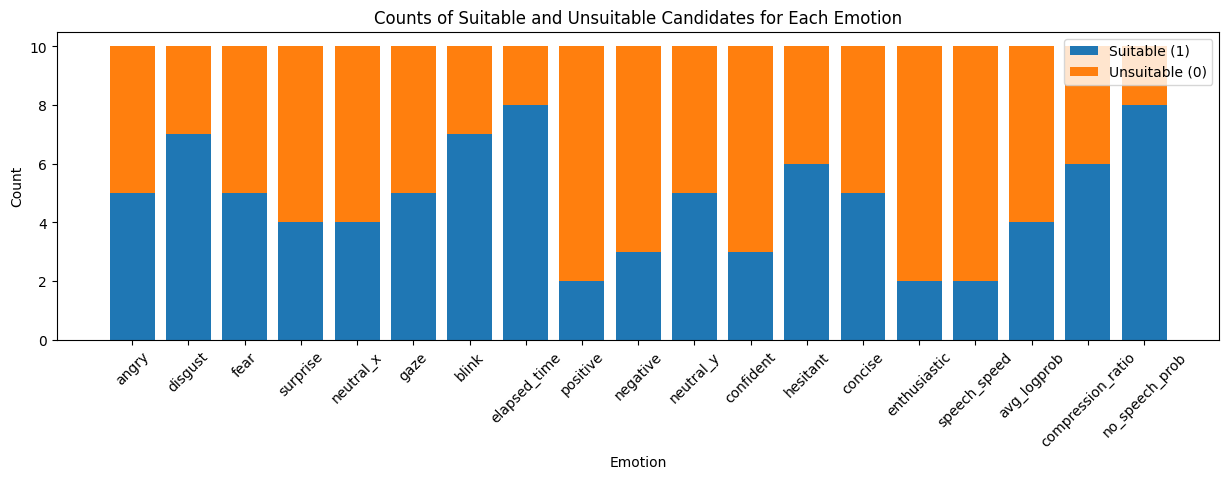

In [23]:
# Distribution of Suitable and Unsuitable Candidates
suitable_counts = combined_data_binary.drop(columns=['candidate id']).sum()
unsuitable_counts = (len(combined_data_binary.drop(columns=['candidate id'])) - suitable_counts).drop(columns=['candidate id'])
plt.figure(figsize=(15, 4))
plt.bar(suitable_counts.index, suitable_counts.values, label='Suitable (1)')
plt.bar(unsuitable_counts.index, unsuitable_counts.values, bottom=suitable_counts.values, label='Unsuitable (0)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Counts of Suitable and Unsuitable Candidates for Each Emotion')
plt.legend()
plt.show()


In [24]:
# Calculate the threshold for the combined score
threshold = len(combined_data_binary.drop(columns=['candidate id']).columns) / 2  # Half of the total number of emotion columns

# Create a DataFrame with 'candidate id' and 'combined_score'
selected_candidates = combined_data_binary[['candidate id']]
selected_candidates['combined_score'] = combined_data_binary.drop(columns=['candidate id']).sum(axis=1)

# Filter candidates where the combined score is greater than half of the emotion columns
selected_candidates['combined_score'] = combined_data_binary[combined_data_binary.drop(columns=['candidate id']).columns].sum(axis=1)
selected_candidates['select'] = selected_candidates['combined_score'] > threshold

# Display the selected candidates
print(selected_candidates)


   candidate id  combined_score  select
0           1.0             7.0   False
1           2.0             7.0   False
2           3.0             8.0   False
3           4.0             8.0   False
4           5.0            10.0    True
5           6.0             9.0   False
6           7.0            11.0    True
7           8.0            10.0    True
8           9.0            12.0    True
9          10.0             9.0   False


In [25]:
import pandas as pd
from sklearn.cluster import KMeans

# Define the number of clusters (you can change this based on your needs)
num_clusters = 2

# Initialize the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your selected features
kmeans.fit(combined_data_mean)

# Add the cluster labels to your DataFrame
combined_data_mean['cluster'] = kmeans.labels_

# Print the first few rows of your DataFrame with cluster labels
print(combined_data_mean[['candidate id', 'cluster']])

   candidate id  cluster
0             1        0
1             2        0
2             3        0
3             4        0
4             5        0
5             6        1
6             7        1
7             8        1
8             9        1
9            10        1


In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract the "Candidate ID" column (assuming it's a string or non-numeric identifier)
candidate_ids = combined_data['candidate id']

# Remove the "Candidate ID" column for scaling and PCA
combined_data_without_id = combined_data.drop(columns=['candidate id'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the remaining columns (features)
scaled_features = scaler.fit_transform(combined_data_without_id)

# Initialize PCA with the reduced number of components (e.g., 10)
n_components = 15
pca = PCA(n_components=n_components)  # Specify the number of components here

# Fit PCA to the scaled features and transform them into principal components
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
principal_components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Add back the "Candidate ID" column to the principal components DataFrame
principal_components_df['candidate id'] = candidate_ids

# Now, principal_components_df contains the principal components, and the "Candidate ID" column remains unaffected.


Text(0, 0.5, 'cumulative explained variance')

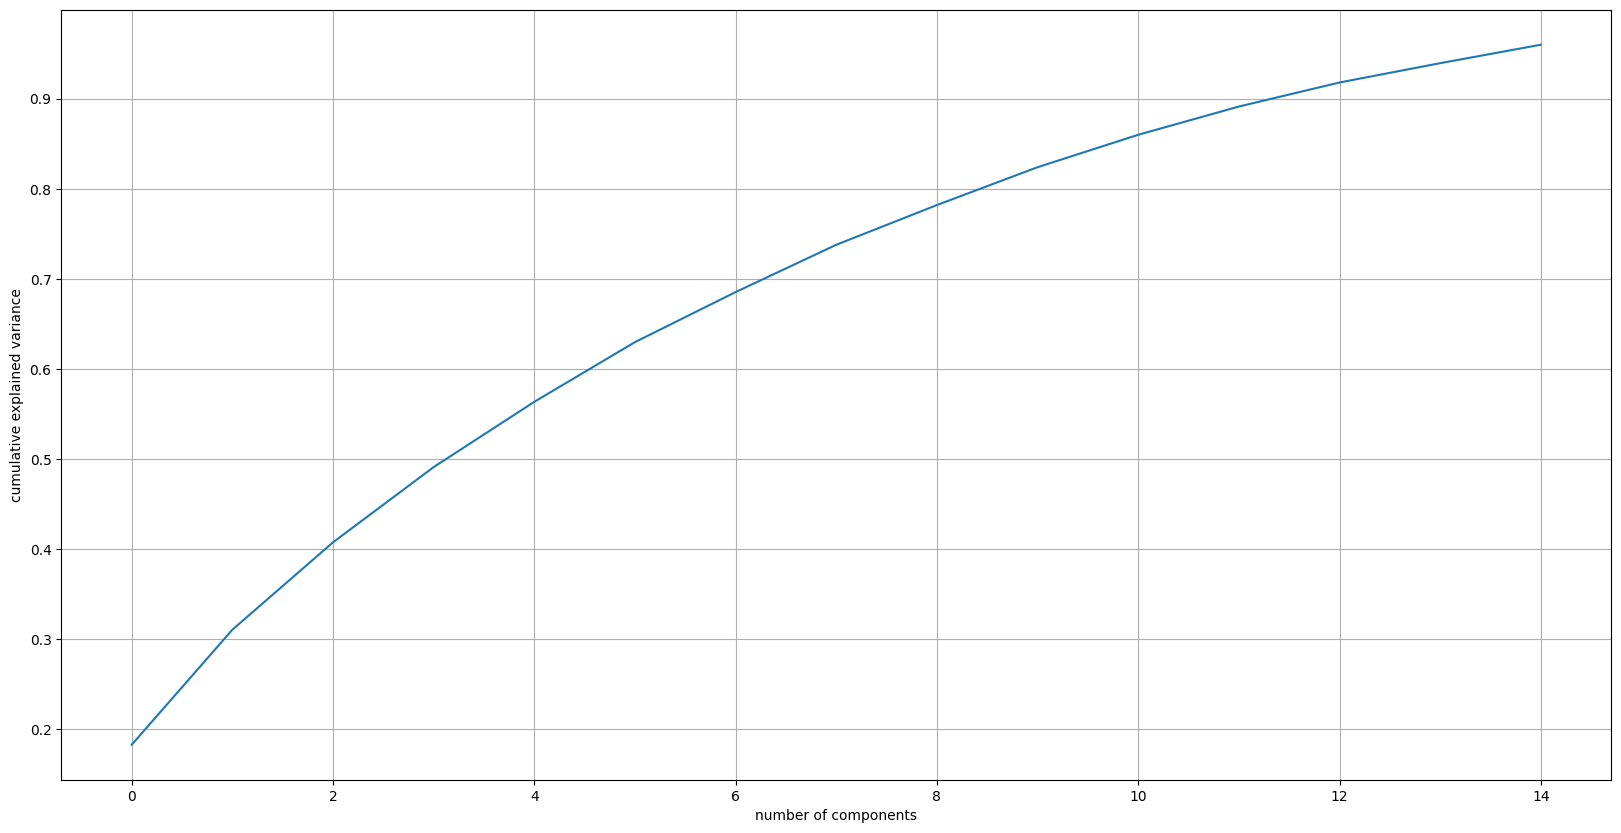

In [27]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [28]:
print(principal_components_df)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      1.654458  1.154207 -0.383752  2.535831  0.253355  0.935804  0.156375   
1     -0.230057  0.910348 -0.171147  2.255945 -0.139796  0.893350  0.528583   
2      1.327915  0.726405 -0.294331  2.555938  0.194121  0.927527  0.281649   
3     -0.289908  1.258528 -0.137253  2.223324 -0.148750  0.829708  0.777043   
4     -0.771544  2.155235 -0.204103  1.922506 -0.310146  0.812081  0.794174   
...         ...       ...       ...       ...       ...       ...       ...   
11644  0.583366 -0.944413 -1.734330 -0.764923 -0.786901 -0.305276 -0.615648   
11645  0.057229  0.670569 -1.876389 -1.008493 -0.903662 -0.320360 -0.553967   
11646 -0.784793  0.376685 -1.811591 -1.227718 -1.190605 -0.384260 -0.340895   
11647  0.120420  0.835798 -0.782891  2.650288 -0.529446  0.133080 -1.533309   
11648 -3.622448 -1.187541 -0.226509  2.920802 -1.093199  0.278013 -1.185336   

            PC8       PC9      PC10      PC11      

Text(0, 0.5, 'WCSSS')

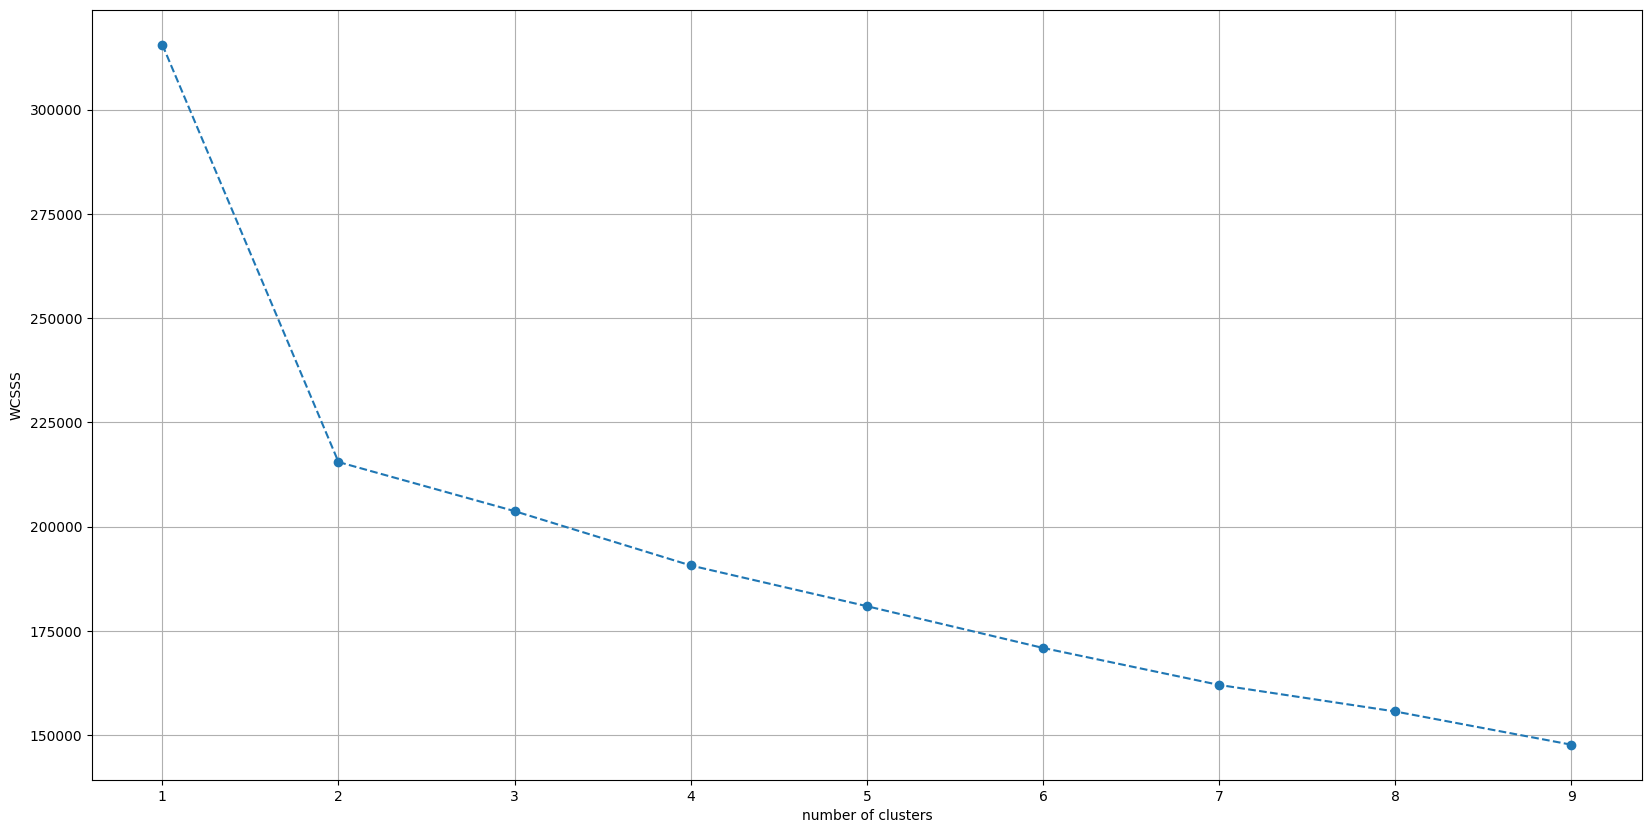

In [29]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters=i) 
    km.fit(principal_components_df)
    wcss.append(km.inertia_)
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('WCSSS')